In [96]:
#Imports
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 

In [97]:
#These first few cells will be the same as the EDA notebook

In [98]:
main_df = pd.read_csv('Pitching_Data_Through_2022_08_07.csv')

In [99]:
main_df.head()

,Unnamed: 0,Name,Team,W,ER,SO,H,BB,CG,HBP,...,FB%_Opp,HR/FB_Opp,Soft%_Opp,Med%_Opp,Hard%_Opp,Pk_Fct_Overall,Pk_Fct_HR,Pk_Fct_SO,Temp,Wind
0,0,Tyler Anderson,LAD,1,0,3,2,1,0,0,...,35.9,8.8,19.9,50.4,29.6,101,125,105,92.0,4.0
1,1,Zach Davies,ARI,0,0,3,4,2,0,0,...,33.4,10.7,18.3,52.2,29.5,101,81,96,72.0,3.0
2,2,Kevin Gausman,TOR,0,0,5,6,0,0,0,...,37.4,13.4,13.8,52.0,34.2,97,94,100,72.0,3.0
3,3,Triston McKenzie,CLE,1,0,8,2,1,0,0,...,38.9,13.5,16.2,53.8,30.1,100,98,102,86.0,3.0
4,4,Jesus Luzardo,MIA,1,0,6,1,1,0,0,...,33.0,14.8,18.2,50.0,31.8,99,99,105,78.0,4.0


In [100]:
main_df.drop(columns = ['Unnamed: 0'], inplace = True)

In [101]:
main_df.shape

(1194, 90)

In [102]:
#Dropping rows that contribute to fantasy points
#Also dropping K% and BB% since we're more interested in a pitcher's K/9 and BB/9
#Also dropping CG_Season and ShO_Season since they're so rare
#Dropping OBP and SLG since we have OPS (on-base plus slugging)
#Dropping xFIP since we have FIP and wRC+ since we have wRC
#Dropping GB% and FB% since and GB_Opp% and FB_Opp% since we have GB/FB for both
#Dropping Outs_Season since we have Avg_Outs
main_df = main_df.drop(columns = ['W', 'ER', 'SO', 'H', 'BB', 'CG', 'HBP', 'ShO', 'Outs', 'QS', 'K%', 'BB%',\
                                 'CG_Season', 'ShO_Season', 'OBP', 'SLG', 'xFIP', 'wRC+', 'GB%', 'FB%',\
                                 'GB%_Opp', 'FB%_Opp', 'CGS', 'NH', 'Outs_Season', 'Proj_Runs', 'Park', 'Hand', 'Opp_Team',\
                                 'Team_Season', 'Position'])

In [103]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 59 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            1194 non-null   object 
 1   Team            1194 non-null   object 
 2   Date            1194 non-null   object 
 3   GS              1194 non-null   float64
 4   Avg_Outs        1194 non-null   float64
 5   W_Season        1194 non-null   float64
 6   ERA             1194 non-null   float64
 7   K/9             1194 non-null   float64
 8   BB/9            1194 non-null   float64
 9   K/BB            1194 non-null   float64
 10  HR/9            1194 non-null   float64
 11  AVG             1194 non-null   float64
 12  BABIP           1194 non-null   float64
 13  FIP             1194 non-null   float64
 14  SIERA           1194 non-null   float64
 15  WHIP            1194 non-null   float64
 16  GB/FB           1194 non-null   float64
 17  LD%             1194 non-null   f

In [104]:
main_df_num = main_df.select_dtypes(include = ['int64', 'float64'])

In [105]:
main_df_corr = main_df_num.corr()

In [106]:
main_df_corr

,GS,Avg_Outs,W_Season,ERA,K/9,BB/9,K/BB,HR/9,AVG,BABIP,...,LD%_Opp,HR/FB_Opp,Soft%_Opp,Med%_Opp,Hard%_Opp,Pk_Fct_Overall,Pk_Fct_HR,Pk_Fct_SO,Temp,Wind
GS,1.000000,0.612585,0.716807,-0.222785,0.082452,-0.154689,0.141815,-0.202110,-0.176407,-0.083836,...,0.011113,0.007079,-0.019751,0.021313,-0.005395,-0.021005,-0.010725,0.018261,0.025442,0.010607
Avg_Outs,0.612585,1.000000,0.582005,-0.391464,0.060450,-0.311532,0.300621,-0.234053,-0.303442,-0.222724,...,0.014143,0.023228,-0.018813,0.023027,-0.005956,0.013489,0.050774,0.032654,0.055346,-0.004621
W_Season,0.716807,0.582005,1.000000,-0.423023,0.197056,-0.302728,0.351296,-0.302528,-0.360772,-0.188225,...,0.026564,-0.005161,0.022192,0.003851,-0.017926,-0.035920,0.021304,0.107933,-0.000965,0.047409
ERA,-0.222785,-0.391464,-0.423023,1.000000,-0.163047,0.367060,-0.346828,0.632280,0.752855,0.531139,...,0.009036,-0.021734,-0.015422,0.038625,-0.020989,0.054796,-0.030562,-0.103201,0.005245,-0.019806
K/9,0.082452,0.060450,0.197056,-0.163047,1.000000,0.040437,0.513107,-0.010659,-0.352940,0.118580,...,0.032903,0.009352,0.050097,-0.017321,-0.019565,0.069992,0.135581,0.168725,-0.025198,0.055241
BB/9,-0.154689,-0.311532,-0.302728,0.367060,0.040437,1.000000,-0.690995,0.049966,0.138826,0.163656,...,0.011743,0.037851,-0.029699,0.027619,-0.002588,0.048600,0.010919,-0.062670,0.008414,-0.055206
K/BB,0.141815,0.300621,0.351296,-0.346828,0.513107,-0.690995,1.000000,-0.054138,-0.280536,-0.038354,...,0.006248,-0.038204,0.072061,-0.033798,-0.020344,-0.018748,0.066127,0.150583,-0.018713,0.052820
HR/9,-0.202110,-0.234053,-0.302528,0.632280,-0.010659,0.049966,-0.054138,1.000000,0.377519,0.036288,...,-0.000810,-0.038797,-0.019784,0.055322,-0.031595,0.020114,-0.001135,-0.063773,0.016985,0.002358
AVG,-0.176407,-0.303442,-0.360772,0.752855,-0.352940,0.138826,-0.280536,0.377519,1.000000,0.818218,...,-0.010107,0.000150,-0.010453,-0.006542,0.011446,0.044101,-0.037793,-0.136340,0.016293,-0.023211
BABIP,-0.083836,-0.222724,-0.188225,0.531139,0.118580,0.163656,-0.038354,0.036288,0.818218,1.000000,...,0.004481,0.018027,0.017904,-0.037065,0.017074,0.079386,0.029058,-0.043563,0.001444,0.000576


In [107]:
FD_corr = main_df_corr['FD_Pts'].sort_values(ascending = False)

In [108]:
FD_corr

FD_Pts            1.000000
DK_Pts            0.990194
Avg_Outs          0.310977
W_Season          0.271873
Proj_Run_Diff     0.265782
GS                0.263977
SwStr%            0.238162
Events            0.221390
K/9               0.219623
K/BB              0.187983
HardHit           0.170964
Barrels           0.151638
GB/FB_Opp         0.105314
K%_Opp            0.104575
Pk_Fct_SO         0.096819
maxEV             0.079142
RS/9              0.067998
Soft%             0.064819
Med%              0.046900
Med%_Opp          0.036619
LD%_Opp           0.033855
Soft%_Opp         0.029593
GB/FB             0.016655
Pk_Fct_HR         0.010309
CStr%            -0.007549
LA               -0.010598
BABIP_Opp        -0.011653
Wind             -0.020225
LD%              -0.033284
HR/FB_Opp        -0.042729
BB%_Opp          -0.047056
Pk_Fct_Overall   -0.047811
BABIP            -0.048123
Hard%_Opp        -0.049808
Temp             -0.059901
wRC              -0.073388
Barrel%          -0.079324
H

In [109]:
DK_corr = main_df_corr['DK_Pts'].sort_values(ascending = False)

In [110]:
DK_corr

DK_Pts            1.000000
FD_Pts            0.990194
Avg_Outs          0.262932
Proj_Run_Diff     0.260713
W_Season          0.247340
SwStr%            0.246125
GS                0.228733
K/9               0.226703
K/BB              0.189685
Events            0.186286
HardHit           0.135630
Barrels           0.127026
K%_Opp            0.104590
GB/FB_Opp         0.102034
Pk_Fct_SO         0.098082
maxEV             0.066868
RS/9              0.066591
Soft%             0.061712
Med%              0.043415
Med%_Opp          0.034140
Soft%_Opp         0.031128
LD%_Opp           0.030516
LA                0.005791
Pk_Fct_HR         0.004262
GB/FB            -0.001131
CStr%            -0.005523
BABIP_Opp        -0.012602
Wind             -0.019611
LD%              -0.034801
HR/FB_Opp        -0.044038
Hard%_Opp        -0.048947
BABIP            -0.050063
Pk_Fct_Overall   -0.054810
BB%_Opp          -0.055075
Temp             -0.065397
Barrel%          -0.065435
HR/FB            -0.072994
w

In [111]:
FD_first_tier = list(FD_corr[FD_corr >= .2].index) + list(FD_corr[FD_corr <= -.2].index)

In [112]:
FD_first_tier

['FD_Pts',
 'DK_Pts',
 'Avg_Outs',
 'W_Season',
 'Proj_Run_Diff',
 'GS',
 'SwStr%',
 'Events',
 'K/9',
 'WHIP',
 'OpenOU',
 'Contact%',
 'FIP',
 'SIERA',
 'Opp_Proj_Runs']

In [113]:
DK_first_tier = list(DK_corr[DK_corr >= .2].index) + list(DK_corr[DK_corr <= -.2].index)

In [114]:
DK_first_tier

['DK_Pts',
 'FD_Pts',
 'Avg_Outs',
 'Proj_Run_Diff',
 'W_Season',
 'SwStr%',
 'GS',
 'K/9',
 'WHIP',
 'OpenOU',
 'FIP',
 'Contact%',
 'SIERA',
 'Opp_Proj_Runs']

In [115]:
first_tier_features = set(FD_first_tier).union(set(DK_first_tier))

In [116]:
first_tier_features = list(first_tier_features)

In [117]:
first_tier_features

['DK_Pts',
 'Avg_Outs',
 'K/9',
 'FIP',
 'GS',
 'SwStr%',
 'FD_Pts',
 'Contact%',
 'Proj_Run_Diff',
 'Opp_Proj_Runs',
 'Events',
 'OpenOU',
 'SIERA',
 'W_Season',
 'WHIP']

In [118]:
main_df_corr = main_df[first_tier_features]

In [119]:
df1 = main_df_corr.pop('FD_Pts')
df2 = main_df_corr.pop('DK_Pts')

In [120]:
main_df_corr['FD_Pts'] = df1
main_df_corr['DK_Pts'] = df2

<ipython-input-120-f9578404dfdb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df_corr['FD_Pts'] = df1
<ipython-input-120-f9578404dfdb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df_corr['DK_Pts'] = df2


In [121]:
main_df_corr = main_df_corr.corr()

In [122]:
main_df_corr

,Avg_Outs,K/9,FIP,GS,SwStr%,Contact%,Proj_Run_Diff,Opp_Proj_Runs,Events,OpenOU,SIERA,W_Season,WHIP,FD_Pts,DK_Pts
Avg_Outs,1.000000,0.060450,-0.321236,0.612585,0.118038,-0.054582,0.257436,-0.295952,0.612915,-0.148341,-0.210505,0.582005,-0.424446,0.310977,0.262932
K/9,0.060450,1.000000,-0.390610,0.082452,0.785324,-0.818527,0.273541,-0.327523,-0.052651,-0.181745,-0.779963,0.197056,-0.235254,0.219623,0.226703
FIP,-0.321236,-0.390610,1.000000,-0.257432,-0.434299,0.381498,-0.298394,0.360442,-0.257441,0.204101,0.633856,-0.432529,0.596992,-0.225234,-0.217198
GS,0.612585,0.082452,-0.257432,1.000000,0.123560,-0.083213,0.223087,-0.265724,0.937054,-0.145658,-0.130270,0.716807,-0.248097,0.263977,0.228733
SwStr%,0.118038,0.785324,-0.434299,0.123560,1.000000,-0.959334,0.299450,-0.373520,0.014237,-0.226631,-0.679365,0.270326,-0.338888,0.238162,0.246125
Contact%,-0.054582,-0.818527,0.381498,-0.083213,-0.959334,1.000000,-0.270092,0.337526,0.044240,0.205569,0.629022,-0.200348,0.260911,-0.213668,-0.222541
Proj_Run_Diff,0.257436,0.273541,-0.298394,0.223087,0.299450,-0.270092,1.000000,-0.840908,0.169677,-0.005799,-0.340643,0.403386,-0.313904,0.265782,0.260713
Opp_Proj_Runs,-0.295952,-0.327523,0.360442,-0.265724,-0.373520,0.337526,-0.840908,1.000000,-0.199668,0.546045,0.409886,-0.429880,0.393746,-0.336645,-0.334608
Events,0.612915,-0.052651,-0.257441,0.937054,0.014237,0.044240,0.169677,-0.199668,1.000000,-0.106280,-0.088457,0.717079,-0.241282,0.221390,0.186286
OpenOU,-0.148341,-0.181745,0.204101,-0.145658,-0.226631,0.205569,-0.005799,0.546045,-0.106280,1.000000,0.230061,-0.169876,0.241630,-0.210613,-0.214695


<AxesSubplot:>

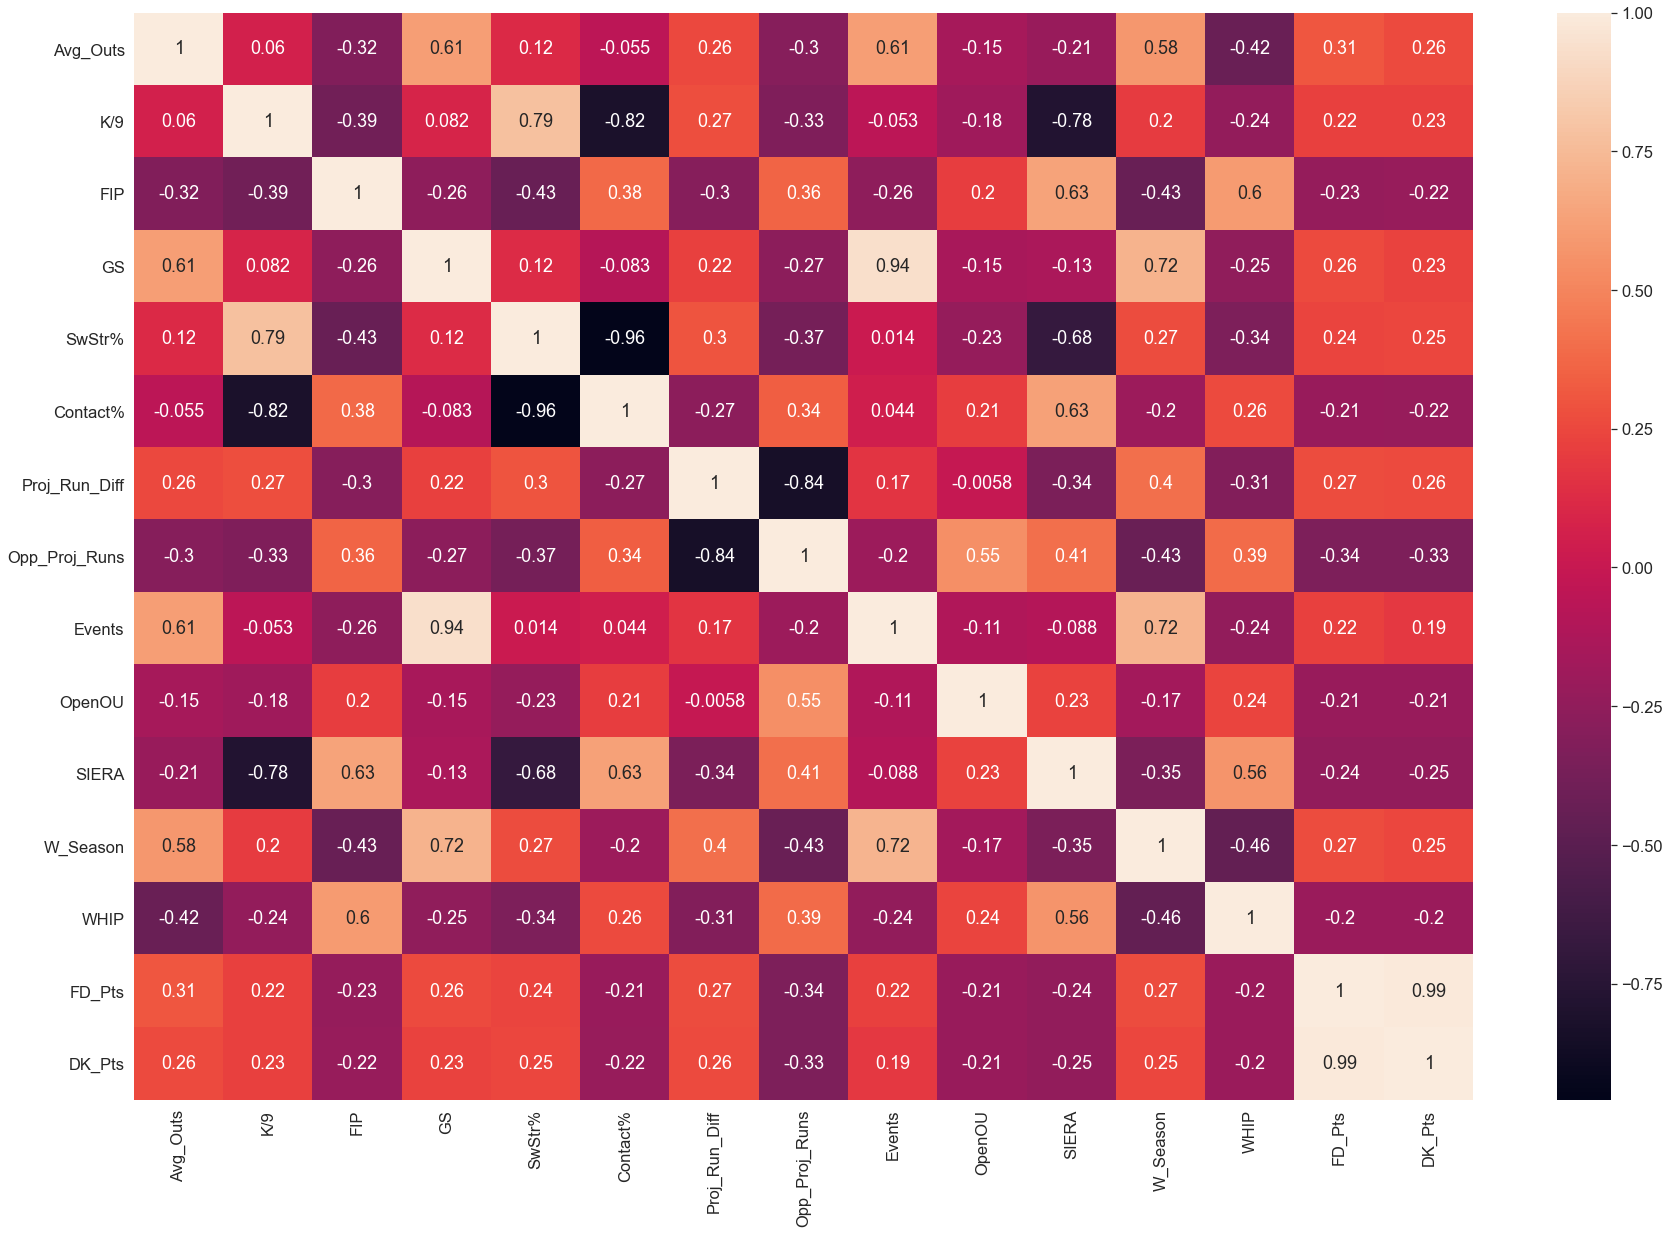

In [123]:
sns.set(font_scale = 1.5)
plt.figure(figsize = (30, 20))
sns.heatmap(main_df_corr, annot = True)

In [124]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 59 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            1194 non-null   object 
 1   Team            1194 non-null   object 
 2   Date            1194 non-null   object 
 3   GS              1194 non-null   float64
 4   Avg_Outs        1194 non-null   float64
 5   W_Season        1194 non-null   float64
 6   ERA             1194 non-null   float64
 7   K/9             1194 non-null   float64
 8   BB/9            1194 non-null   float64
 9   K/BB            1194 non-null   float64
 10  HR/9            1194 non-null   float64
 11  AVG             1194 non-null   float64
 12  BABIP           1194 non-null   float64
 13  FIP             1194 non-null   float64
 14  SIERA           1194 non-null   float64
 15  WHIP            1194 non-null   float64
 16  GB/FB           1194 non-null   float64
 17  LD%             1194 non-null   f

In [125]:
main_df = main_df.set_index(['Date', 'Name', 'Team'])

In [126]:
main_df = main_df[first_tier_features]

In [127]:
main_df.head()

DK_Pts   Avg_Outs    K/9   FIP    GS  \
Date       Name             Team                                         
2022-08-07 Tyler Anderson   LAD    23.95  17.888889   7.34  3.36  18.0   
           Zach Davies      ARI    13.65  15.375000   6.91  4.58  16.0   
           Kevin Gausman    TOR    19.90  16.750000  10.64  2.01  20.0   
           Triston McKenzie CLE    36.20  18.473684   8.48  4.10  19.0   
           Jesus Luzardo    MIA    30.55  14.571429  12.18  3.35   7.0   

                                  SwStr%  FD_Pts  Contact%  Proj_Run_Diff  \
Date       Name             Team                                            
2022-08-07 Tyler Anderson   LAD     12.1      40      76.9           0.45   
           Zach Davies      ARI      8.7      24      79.7           0.95   
           Kevin Gausman    TOR     15.8      37      71.6           0.80   
           Triston McKenzie CLE     12.0      58      76.4          -0.80   
           Jesus Luzardo    MIA     13.9      49      67.7          -0.30   

                                  Opp_Proj_Runs  Events  OpenOU  SIERA  \
Date       Name             Team                                         
2022-08-07 Tyler Anderson   LAD           4.275   336.0     9.0   3.95   
           Zach Davies      ARI           3.525   250.0     8.0   4.52   
           Kevin Gausman    TOR           3.600   311.0     8.0   2.95   
           Triston McKenzie CLE           4.400   320.0     8.0   3.88   
           Jesus Luzardo    MIA           4.150    76.0     8.0   3.31   

                                  W_Season  WHIP  
Date       Name             Team                  
2022-08-07 Tyler Anderson   LAD       12.0  1.03  
           Zach Davies      ARI        2.0  1.22  
           Kevin Gausman    TOR        8.0  1.24  
           Triston McKenzie CLE        7.0  1.00  
           Jesus Luzardo    MIA        2.0  1.09

In [129]:
X = main_df.drop(columns = ['DK_Pts', 'FD_Pts'])

In [130]:
y_FD = main_df['FD_Pts']
y_DK = main_df['DK_Pts']

In [131]:
y_FD

Date        Name              Team
2022-08-07  Tyler Anderson    LAD     40
            Zach Davies       ARI     24
            Kevin Gausman     TOR     37
            Triston McKenzie  CLE     58
            Jesus Luzardo     MIA     49
                                      ..
2022-06-20  Zach Davies       ARI     15
            Noah Syndergaard  LAA     22
            Alex Faedo        DET      7
            Jose Berrios      TOR     -3
            Caleb Kilian      CHC      1
Name: FD_Pts, Length: 1194, dtype: int64

In [132]:
X

Avg_Outs    K/9   FIP    GS  SwStr%  \
Date       Name             Team                                         
2022-08-07 Tyler Anderson   LAD   17.888889   7.34  3.36  18.0    12.1   
           Zach Davies      ARI   15.375000   6.91  4.58  16.0     8.7   
           Kevin Gausman    TOR   16.750000  10.64  2.01  20.0    15.8   
           Triston McKenzie CLE   18.473684   8.48  4.10  19.0    12.0   
           Jesus Luzardo    MIA   14.571429  12.18  3.35   7.0    13.9   
...                                     ...    ...   ...   ...     ...   
2022-06-20 Zach Davies      ARI   15.923077   7.43  4.03  13.0     9.2   
           Noah Syndergaard LAA   15.300000   6.18  3.72  10.0    10.2   
           Alex Faedo       DET   15.000000   7.43  4.40   8.0    11.1   
           Jose Berrios     TOR   16.538462   7.79  4.45  13.0     9.3   
           Caleb Kilian     CHC   13.500000   6.00  4.46   2.0     6.5   

                                  Contact%  Proj_Run_Diff  Opp_Proj_Runs  \
Date       Name             Team                                           
2022-08-07 Tyler Anderson   LAD       76.9       0.450000       4.275000   
           Zach Davies      ARI       79.7       0.950000       3.525000   
           Kevin Gausman    TOR       71.6       0.800000       3.600000   
           Triston McKenzie CLE       76.4      -0.800000       4.400000   
           Jesus Luzardo    MIA       67.7      -0.300000       4.150000   
...                                    ...            ...            ...   
2022-06-20 Zach Davies      ARI       78.6      -1.734375       4.617188   
           Noah Syndergaard LAA       79.3       1.487500       3.506250   
           Alex Faedo       DET       77.5      -1.543750       5.521875   
           Jose Berrios     TOR       80.8       0.318750       4.090625   
           Caleb Kilian     CHC       84.3       0.000000       4.250000   

                                  Events  OpenOU  SIERA  W_Season  WHIP  
Date       Name             Team                                         
2022-08-07 Tyler Anderson   LAD    336.0     9.0   3.95      12.0  1.03  
           Zach Davies      ARI    250.0     8.0   4.52       2.0  1.22  
           Kevin Gausman    TOR    311.0     8.0   2.95       8.0  1.24  
           Triston McKenzie CLE    320.0     8.0   3.88       7.0  1.00  
           Jesus Luzardo    MIA     76.0     8.0   3.31       2.0  1.09  
...                                  ...     ...    ...       ...   ...  
2022-06-20 Zach Davies      ARI    204.0     7.5   4.22       2.0  1.20  
           Noah Syndergaard LAA    163.0     8.5   4.39       4.0  1.18  
           Alex Faedo       DET    125.0     9.5   4.40       1.0  1.40  
           Jose Berrios     TOR    219.0     8.5   4.03       5.0  1.24  
           Caleb Kilian     CHC     27.0     8.5   6.21       0.0  1.67  

[1194 rows x 13 columns]

In [133]:
X_train, X_test, y_FD_train, y_FD_test = train_test_split(X, y_FD, test_size = 0.3, random_state = 43)

In [134]:
from sklearn.preprocessing import StandardScaler

In [135]:
scaler = StandardScaler()

In [136]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [137]:
X_scaled_df = pd.DataFrame(X_train, columns = X.columns)

In [138]:
X_scaled_df

,Avg_Outs,K/9,FIP,GS,SwStr%,Contact%,Proj_Run_Diff,Opp_Proj_Runs,Events,OpenOU,SIERA,W_Season,WHIP
0,-0.218025,0.388797,-0.823638,-0.230978,-0.543154,0.226607,0.052679,-0.286879,-0.607148,-0.454011,-0.640369,-0.052977,-0.903760
1,-1.581840,0.321803,-0.096934,-0.947954,-0.021226,0.068134,0.582033,-0.435177,-0.458006,0.101039,-0.248800,-1.110406,1.335345
2,-0.185105,-1.306683,0.970124,-0.589466,-2.021951,1.924533,0.061502,0.298898,-0.584203,0.656089,1.060931,-0.052977,1.009657
3,0.277599,2.553241,-1.191589,1.023730,2.370945,-2.671186,0.207074,-0.120044,0.230343,0.101039,-1.207469,1.356928,-0.089540
4,-3.685564,-0.188387,-0.050940,-2.202663,-0.086467,-0.146937,-0.167885,0.195090,-1.066048,0.101039,0.595099,-0.581691,-0.191317
...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,0.519010,-1.090239,0.280216,1.023730,-0.804119,0.860499,0.132082,-0.057017,1.377591,0.101039,0.817889,0.299499,0.195437
831,-0.185105,1.373104,-3.058942,-2.023419,4.197694,-1.924099,0.290889,-1.080273,-2.201823,-1.564111,-3.327342,-1.462882,-2.695044
832,0.367599,0.058978,-0.437289,1.202974,0.805160,-0.656314,0.694521,-0.529717,0.826912,0.101039,-0.370321,2.766833,-1.473714
833,0.901244,0.646469,-0.207320,-0.051734,-0.412672,-0.022422,-1.923577,1.967250,0.115618,0.656089,-0.883411,-0.052977,-0.211673


In [139]:
X_scaled_df.mean()

Avg_Outs        -1.874748e-17
K/9             -4.423940e-16
FIP              4.294635e-16
GS               8.376533e-17
SwStr%           1.535033e-16
Contact%         1.434847e-15
Proj_Run_Diff   -6.621450e-17
Opp_Proj_Runs    1.234541e-16
Events           4.307931e-17
OpenOU          -2.257010e-16
SIERA           -2.645256e-16
W_Season         3.331999e-16
WHIP             5.694713e-16
dtype: float64

In [140]:
X_scaled_df.std()

Avg_Outs         1.000599
K/9              1.000599
FIP              1.000599
GS               1.000599
SwStr%           1.000599
Contact%         1.000599
Proj_Run_Diff    1.000599
Opp_Proj_Runs    1.000599
Events           1.000599
OpenOU           1.000599
SIERA            1.000599
W_Season         1.000599
WHIP             1.000599
dtype: float64

In [141]:
from sklearn.linear_model import LinearRegression

In [144]:
from sklearn.metrics import mean_absolute_error

In [151]:
base_LR_FD = LinearRegression()
base_LR_FD.fit(X_train, y_FD_train)
y_FD_pred = base_LR_FD.predict(X_test)

print(f"R_squared_train: {base_LR_FD.score(X_train, y_FD_train)}")
print(f"R_squared_test: {base_LR_FD.score(X_test, y_FD_test)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_FD_test, y_FD_pred)}")

R_squared_train: 0.18071066533848312
R_squared_test: 0.19072120487638278
Mean Absolute Error: 12.24811229330219


**Baseline Linear Regression with 13 features:**<br>
R_squared_train: 0.18071066533848312
R_squared_test: 0.19072120487638278
Mean Absolute Error: 12.24811229330219